In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from clean import clean_dataset 
from exploration import explore
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df1=clean_dataset("data/winequality-red.csv")
df2=clean_dataset("data/winequality-white.csv")

First rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8     

In [3]:
# Transformer les scores de qualité en catégories (faible, moyenne, élevée)
df1['quality_label'] = df1['quality'].apply(
    lambda q: 'low' if q <= 5 else 'medium' if q == 6 else 'high'
)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  quality_label         1359 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 148.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['label'] = le.fit_transform(df1['quality_label'])  # low=1, medium=2, high=0


In [6]:
X = df1.drop(['quality', 'quality_label', 'label'], axis=1)
y = df1['label']

# Separation between test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


[[20  5  9]
 [ 8 94 33]
 [23 40 40]]
              precision    recall  f1-score   support

        high       0.39      0.59      0.47        34
         low       0.68      0.70      0.69       135
      medium       0.49      0.39      0.43       103

    accuracy                           0.57       272
   macro avg       0.52      0.56      0.53       272
weighted avg       0.57      0.57      0.56       272



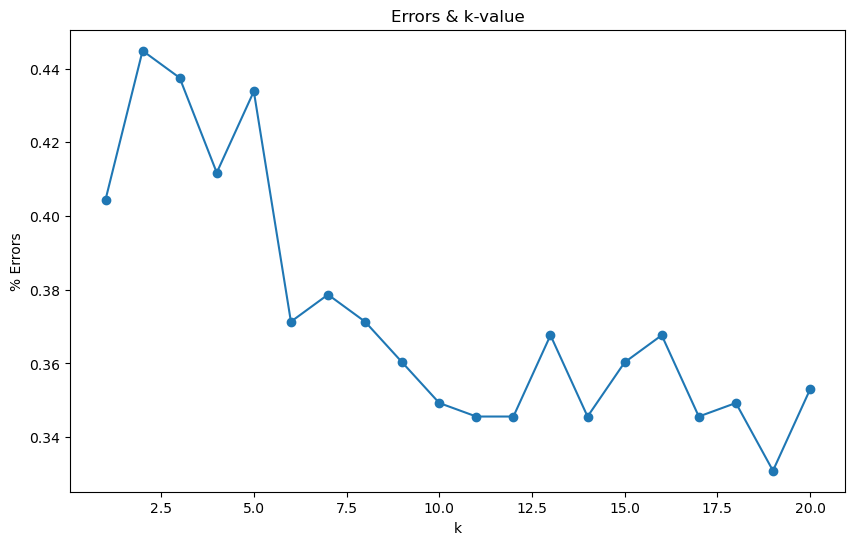

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)  # tu peux essayer avec d'autres valeurs
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))



error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o')
plt.title('Errors & k-value')
plt.xlabel('k')
plt.ylabel('% Errors')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

optimal_k = 6  #change this one if you think there is another optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Prediction on the test data
y_pred = knn.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[ 19,   5,  10],
       [  7, 106,  22],
       [ 17,  40,  46]], dtype=int64)